<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data analysis</a></span><ul class="toc-item"><li><span><a href="#Fashion-MNIST" data-toc-modified-id="Fashion-MNIST-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fashion MNIST</a></span><ul class="toc-item"><li><span><a href="#Class-label-distribution" data-toc-modified-id="Class-label-distribution-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Class label distribution</a></span></li></ul></li><li><span><a href="#CIFAR-10" data-toc-modified-id="CIFAR-10-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>CIFAR-10</a></span><ul class="toc-item"><li><span><a href="#Class-label-distribution" data-toc-modified-id="Class-label-distribution-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Class label distribution</a></span></li></ul></li><li><span><a href="#Comment-on-class-labels-distribution-and-input-dimensionality" data-toc-modified-id="Comment-on-class-labels-distribution-and-input-dimensionality-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Comment on class labels distribution and input dimensionality</a></span></li></ul></li><li><span><a href="#Classification" data-toc-modified-id="Classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Naive-bayes-classifier" data-toc-modified-id="Naive-bayes-classifier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Naive-bayes classifier</a></span><ul class="toc-item"><li><span><a href="#Fashion-MNIST---Data-preparation" data-toc-modified-id="Fashion-MNIST---Data-preparation-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Fashion MNIST - Data preparation</a></span></li><li><span><a href="#Fashion-MNIST---Prediction" data-toc-modified-id="Fashion-MNIST---Prediction-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Fashion MNIST - Prediction</a></span></li><li><span><a href="#CIFAR-10---Data-preparation" data-toc-modified-id="CIFAR-10---Data-preparation-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>CIFAR-10 - Data preparation</a></span></li><li><span><a href="#CIFAR-10---Prediction" data-toc-modified-id="CIFAR-10---Prediction-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>CIFAR-10 - Prediction</a></span></li><li><span><a href="#Comparison-with-a-random-classifier" data-toc-modified-id="Comparison-with-a-random-classifier-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Comparison with a random classifier</a></span></li></ul></li></ul></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Linear Regression</a></span></li></ul></div>

# Introduction
Notebook by: Sara Giammusso.

In this notebook I analyzed the Fashion MNIST and CIFAR10 datasets available to download from: 
<ul>
    <li>https://www.kaggle.com/zalando-research/fashionmnist/data</li>
    <li>https://www.cs.toronto.edu/~kriz/cifar.html</li>
</ul>

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.metrics import confusion_matrix
sns.set()
sns.set_color_codes()
plt.rcParams['font.family'] = 'Tahoma'
from sklearn.model_selection import train_test_split


In [ ]:
def read_mnist(dataset='training', path='.'):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    From: https://gist.github.com/akesling/5358964
    """
    import os, struct

    if dataset is 'training':
        fname_img = os.path.join(path, 'fashionmnist/train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'fashionmnist/train-labels-idx1-ubyte')
    elif dataset is 'testing':
        fname_img = os.path.join(path, 'fashionmnist/t10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'fashionmnist/t10k-labels-idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    return list(zip(lbl, img))

# Data analysis
In this section I'm going to import and analyse the Fashion MNIST and CIFAR10 datasets.

## Fashion MNIST

Let's start with Fashion MNIST.<br>
Each training and test example is assigned to one of the following labels:

<table style="width:30%">
  <tr>
    <th>Label</th>
    <th>Description</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

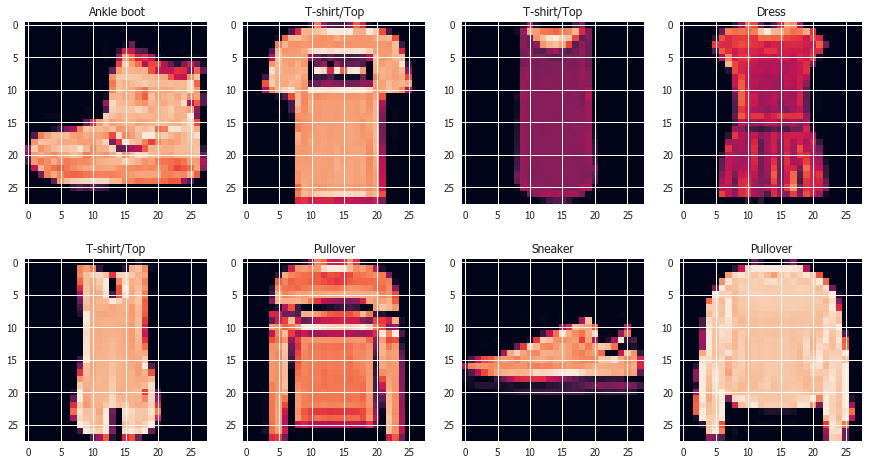

In [2]:
mnist_labels = ['T-shirt/Top', 'Trouser','Pullover','Dress','Coat','Sandal', 'Shirt',
               'Sneaker','Bag','Ankle boot']
mnist_train = read_mnist('training')
mnist_test = read_mnist('testing')

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
for ax, (label, image) in zip(axes.flat, mnist_train[:8]):
    ax.imshow(image)
    ax.set_title(mnist_labels[label])
plt.show()

In [4]:
data_train_mnist = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')
data_test_mnist = pd.read_csv('./fashionmnist/fashion-mnist_test.csv')

data_train_mnist.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Class label distribution

The class labels are perfectly balanced.<br>
This is true both for the training set (6000 samples per class) and for the test set (1000 samples per class).

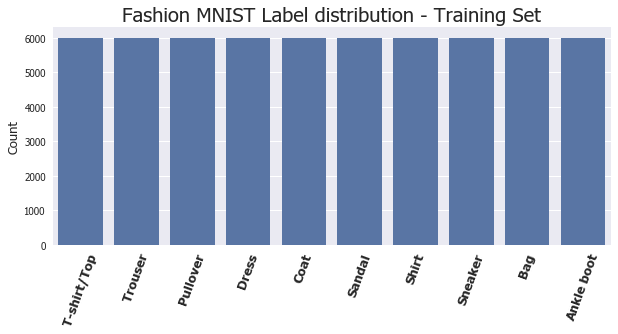

In [97]:
plt.figure(figsize=(10,4))

label_distribution = data_train_mnist['label'].value_counts()

ax = sns.barplot(x = np.array(range(10)), y = label_distribution, color='b')
ax.set_title('Fashion MNIST Label distribution - Training Set',fontsize=20)
ax.set_xticklabels(mnist_labels, fontsize=13, weight='bold', rotation=70)
ax.set_ylabel('Count',fontsize=13)
plt.show()

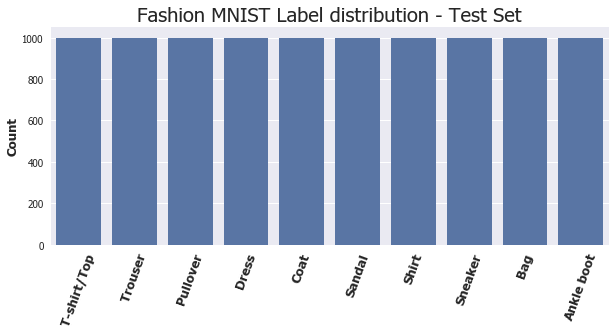

In [6]:
plt.figure(figsize=(10,4))

label_distribution = data_test_mnist['label'].value_counts()

ax = sns.barplot(x = np.array(range(10)), y = label_distribution, color='b')
ax.set_title('Fashion MNIST Label distribution - Test Set',fontsize=20)
ax.set_xticklabels(mnist_labels, fontsize=13, weight='bold', rotation=70)
ax.set_ylabel('Count',fontsize=13, weight='bold')
plt.show()

In [15]:
## Not usefull now, maybe for the bonus point
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

X_mnist = np.array(data_train_mnist.iloc[:, 1:])
y_mnist = np.array(data_train_mnist.iloc[:, 0])

#Here we split validation data to optimiza classifier during training
X_train_mnist, X_val_mnist, y_train_mnist, y_val_mnist = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=13)

#Test data
X_test_mnist = np.array(data_test_mnist.iloc[:, 1:])
y_test_mnist = np.array(data_test_mnist.iloc[:, 0])

X_train_mnist = X_train_mnist.reshape(X_train_mnist.shape[0], img_rows, img_cols, 1)
X_test_mnist = X_test_mnist.reshape(X_test_mnist.shape[0], img_rows, img_cols, 1)
X_val_mnist = X_val_mnist.reshape(X_val_mnist.shape[0], img_rows, img_cols, 1)

X_train_mnist = X_train_mnist.astype('float32')
X_test_mnist = X_test_mnist.astype('float32')
X_val_mnist = X_val_mnist.astype('float32')
X_train_mnist /= 255
X_test_mnist /= 255
X_val_mnist /= 255
print(np.shape(X_train_mnist), np.shape(X_val_mnist), np.shape(X_test_mnist))
print(np.shape(y_train_mnist), np.shape(y_val_mnist), np.shape(y_test_mnist))

(48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)
(48000,) (12000,) (10000,)


## CIFAR-10


The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. <br>

The dataset is divided into five training batches and one test batch, each with 10000 images. <br>
The test batch contains exactly 1000 randomly-selected images from each class.<br>
The training batches contain exactly 5000 images from each class. 

In [29]:
'''
From https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/cifar10.py

Functions for downloading the CIFAR-10 data-set from the internet 
and loading it into memory.

'''

import pickle
import os

data_path = "./cifar-10-batches-py/"

# Width and height of each image.
img_size = 32

# Number of channels in each image, 3 channels: Red, Green, Blue.
num_channels = 3

# Length of an image when flattened to a 1-dim array.
img_size_flat = img_size * img_size * num_channels

# Number of classes.
num_classes = 10

# Number of files for the training-set.
_num_files_train = 5

# Number of images for each batch-file in the training-set.
_images_per_file = 10000

# Total number of images in the training-set.
# This is used to pre-allocate arrays for efficiency.
_num_images_train = _num_files_train * _images_per_file

def load_class_names():
    """
    Load the names for the classes in the CIFAR-10 data-set.
    Returns a list with the names. Example: names[3] is the name
    associated with class-number 3.
    """

    # Load the class-names from the pickled file.
    raw = _unpickle(filename="batches.meta")[b'label_names']

    # Convert from binary strings.
    names = [x.decode('utf-8') for x in raw]

    return names

def _get_file_path(filename=""):
    """
    Return the full path of a data-file for the data-set.
    If filename=="" then return the directory of the files.
    """
    return os.path.join(data_path, filename)


def _unpickle(filename):
    """
    Unpickle the given file and return the data.
    Note that the appropriate dir-name is prepended the filename.
    """

    # Create full path for the file.
    file_path = _get_file_path(filename)

    print("Loading data: " + file_path)

    with open(file_path, mode='rb') as file:
        # In Python 3.X it is important to set the encoding,
        # otherwise an exception is raised here.
        data = pickle.load(file, encoding='bytes')

    return data

def _convert_images(raw):
    """
    Convert images from the CIFAR-10 format and
    return a 4-dim array with shape: [image_number, height, width, channel]
    where the pixels are floats between 0.0 and 1.0.
    """

    # Convert the raw images from the data-files to floating-points.
    raw_float = np.array(raw, dtype=float) / 255.0

    # Reshape the array to 4-dimensions.
    images = raw_float.reshape([-1, num_channels, img_size, img_size])

    # Reorder the indices of the array.
    images = images.transpose([0, 2, 3, 1])

    return images



def _load_data(filename):
    """
    Load a pickled data-file from the CIFAR-10 data-set
    and return the converted images (see above) and the class-number
    for each image.
    """

    # Load the pickled data-file.
    data = _unpickle(filename)

    # Get the raw images.
    raw_images = data[b'data']

    # Get the class-numbers for each image. Convert to numpy-array.
    cls = np.array(data[b'labels'])

    # Convert the images.
    images = _convert_images(raw_images)

    return images, cls



def load_training_data():
    """
    Load all the training-data for the CIFAR-10 data-set.
    The data-set is split into 5 data-files which are merged here.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    # Pre-allocate the arrays for the images and class-numbers for efficiency.
    images = np.zeros(shape=[_num_images_train, img_size, img_size, num_channels], dtype=float)
    cls = np.zeros(shape=[_num_images_train], dtype=int)

    # Begin-index for the current batch.
    begin = 0

    # For each data-file.
    for i in range(_num_files_train):
        # Load the images and class-numbers from the data-file.
        images_batch, cls_batch = _load_data(filename="data_batch_" + str(i + 1))

        # Number of images in this batch.
        num_images = len(images_batch)

        # End-index for the current batch.
        end = begin + num_images

        # Store the images into the array.
        images[begin:end, :] = images_batch

        # Store the class-numbers into the array.
        cls[begin:end] = cls_batch

        # The begin-index for the next batch is the current end-index.
        begin = end

    return images, cls

def load_test_data():
    """
    Load all the test-data for the CIFAR-10 data-set.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    images, cls = _load_data(filename="test_batch")

    return images, cls

In [30]:
images, cls = load_training_data()
images_test, cls_test = load_test_data()

Loading data: ./cifar-10-batches-py/data_batch_1
Loading data: ./cifar-10-batches-py/data_batch_2
Loading data: ./cifar-10-batches-py/data_batch_3
Loading data: ./cifar-10-batches-py/data_batch_4
Loading data: ./cifar-10-batches-py/data_batch_5
Loading data: ./cifar-10-batches-py/test_batch


In [9]:
print(np.shape(images))

(50000, 32, 32, 3)


In [10]:
print(np.shape(cls))

(50000,)


In [11]:
class_names = load_class_names()
class_names

Loading data: ./cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [12]:
'''
Helper-function to plot CIFAR-10 images 
from https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/cifar10.py
'''
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true) == 9

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing if we need to print ensemble and best-net.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Interpolation type.
        if smooth:
            interpolation = 'spline16'
        else:
            interpolation = 'nearest'

        # Plot image.
        ax.imshow(images[i, :, :, :],
                  interpolation=interpolation)
            
        # Name of the true class.
        cls_true_name = class_names[cls_true[i]]

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true_name)
        else:
            # Name of the predicted class.
            cls_pred_name = class_names[cls_pred[i]]

            xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

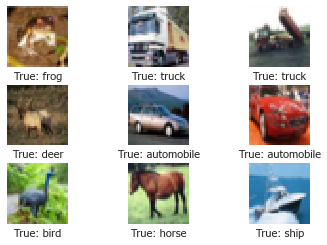

In [95]:
# Plot the images and labels using our helper-function above.
plot_images(images=images[:9], cls_true=cls[:9], smooth=False)

### Class label distribution

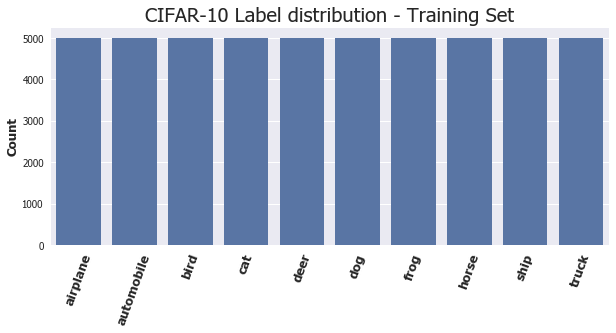

In [28]:
plt.figure(figsize=(10,4))

label_distribution = np.bincount(cls)

ax = sns.barplot(x = np.array(range(10)), y = label_distribution, color='b')
ax.set_title('CIFAR-10 Label distribution - Training Set',fontsize=20)
ax.set_xticklabels(class_names, fontsize=13, weight='bold', rotation=70)
ax.set_ylabel('Count',fontsize=13, weight='bold')
plt.show()

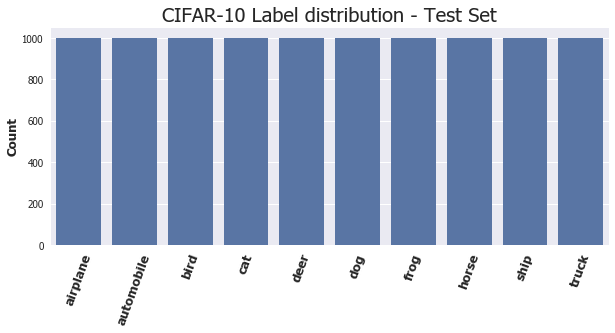

In [31]:
plt.figure(figsize=(10,4))

label_distribution = np.bincount(cls_test)

ax = sns.barplot(x = np.array(range(10)), y = label_distribution, color='b')
ax.set_title('CIFAR-10 Label distribution - Test Set',fontsize=20)
ax.set_xticklabels(class_names, fontsize=13, weight='bold', rotation=70)
ax.set_ylabel('Count',fontsize=13, weight='bold')
plt.show()

## Comment on class labels distribution and input dimensionality
In both Fashion MNIST and CIFAR-10, class labels are perfectly balanced (both in training set and in test set). <br>
This is a great advantage, indeed most algorithms minimize a sum of a loss function over all data points. This works better for balanced datasets, and worse for unbalanced datasets. For example, consider a highly unbalanced dataset — 90% points of class 1 and 10% points of class -1. Then, the loss is very low if you predict all points belonging to class 1.<br>
So the risks we can encounter with an unbalanced trainig set are: 
<ul>
    <li>classification algorithms may favor predictions of the majority class either entirely, by always predicting the same label or at least in a biased manner that may or may not reflect the true distribution of classes "out in the world"</li>
    <li>you might not learn as much as you can from the minority-class examples since their features might be washed out by all the majority-class examples</li>
</ul>

TODO: Comment on input dimensionality

# Classification

## Naive-bayes classifier
<script type="text/javascript" src="http://latex.codecogs.com/latexit.js"></script>
This probabilistic classifier is based on Bayes rule:
$$P(t_{new}=k\mid X,t,x_{new}) = \frac{P(x_{new}\mid t_{new}=k, X, t)P(t_{new}=k)}{\sum_j p(x_{new}\mid t_{new}=j,X,t)P(t_{new}=j)}$$
Naive-bayes makes the following additional likelihood assumption: the components of $x_{new}$ are independent for a particular class,i.e. 
$$P(x_{new}\mid t_{new}=k,X,t) = \prod_{d=1}p(x^{new}_d\mid t_{new}=k,X,t)$$
where $D$ is the number of dimensions and $x_d^{new}$ is the valued of dth one.<br>

<b>Advantages</b>:<ol>
    <li>it can be used when D is high because fitting D uni-variate distributions is easier than fitting one D-dimensional one</li>
    <li>Simple to implement</li>
</ol>
<b>Disadvantage</b>: <ol>
    <li>Naive Bayes classifier makes a very strong assumption on the shape of your data distribution, i.e. any two features are independent given the output class. Due to this, the result can be (potentially) very bad</li>
    </ol>
    
In our case, D is really high (28x28 for the Fashion MNIST dataset and 32x32x3 for the CIFAR-10 dataset) so Naive-bayes could be a great solution. However the input dimension is too big thus making the computation time really high.<br>
Moreover the naive assumption maybe does not fit well our problem since, I am not sure that given a class label, the different pixel values in a picture are totally independent, e.g., if you know that the picture is a t-shirt and you know the value of a pixel in the majority of the cases you expect the pixel next to it to have a similar value. 

In [299]:
def prior_means_variance(train, N):
    p = np.bincount(train[:,0])/len(train)
    # m = (10,28*28)
    m = np.zeros((N, np.shape(train)[1]-1))
    # v = (10,28*28)
    v = np.zeros((N, np.shape(train)[1]-1))
    for i in range(N):
        m[i] = np.mean([x[1:] for x in train if x[0] == i], axis=0)
        v[i] = np.var([x[1:] for x in train if x[0] == i], axis=0)
        for j in range(np.shape(train)[1]-1):
            if v[i,j] <= 0:
                v[i,j] = 1e-10
    return p, m, v

def predict(X, prior, m, v):
    # X = (num_samples, num_features)
    # prior = (num_class,)
    # m = (num_class, num_features)
    # v = (num_class, num_features)
    # predictions = (num_classes, num_samples) --> I'll return the transpose
    predictions = np.zeros((len(prior),len(X)))
  
    for i in range(len(prior)):
        prior_i = np.log(prior[i])
        gaussian_i = -0.5 * (np.sum(np.log(2. * np.pi * v[i,:])) + np.sum(((X - m[i,:])**2) / (v[i,:]), 1))
     
        predictions[i] = prior_i + gaussian_i      
    
    return np.argmax(predictions.T,axis = 1)

def accuracy(y, t): 
    # y = computed class
    # t = true class
    return np.sum([y[i] == t[i] for i in range(len(y))]) / len(y)

### Fashion MNIST - Data preparation
<script type="text/javascript" src="http://latex.codecogs.com/latexit.js"></script>
I calculate $\mu$, $\sigma^2$ and $p(t=k)$ for all the classes.

In [297]:
N = 10 # number of classes
mnist_train = data_train_mnist.values
mnist_test  = data_test_mnist.values

mnist_prior, mnist_means, mnist_vars = prior_means_variance(mnist_train_norm, N)

X = mnist_test_norm[:,1:]

### Fashion MNIST - Prediction

In [301]:
start_time = time.time()
mnist_predictions = predict(X, mnist_prior, mnist_means, mnist_vars)
elapsed_time = time.time() - start_time

print('Accuracy Naive-Bayes: %.2f%%' % (accuracy(mnist_predictions, mnist_test[:,0]) * 100))
print('Elapsed time: %.2f' %elapsed_time)

(10000,)
Accuracy Naive-Bayes: 57.53%
Elapsed time: 0.81


[Text(0,0.5,'T-shirt/Top'),
 Text(0,1.5,'Trouser'),
 Text(0,2.5,'Pullover'),
 Text(0,3.5,'Dress'),
 Text(0,4.5,'Coat'),
 Text(0,5.5,'Sandal'),
 Text(0,6.5,'Shirt'),
 Text(0,7.5,'Sneaker'),
 Text(0,8.5,'Bag'),
 Text(0,9.5,'Ankle boot')]

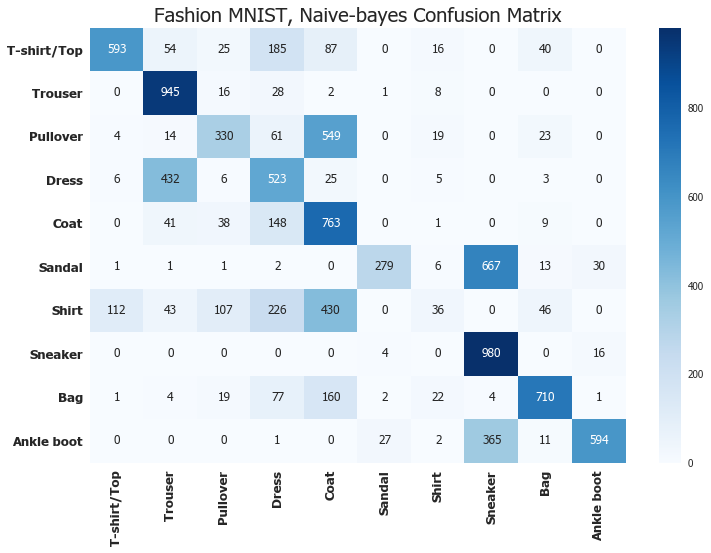

In [302]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(mnist_test[:,0], mnist_predictions[:])
df_cnf_matrix = pd.DataFrame(data=cnf_matrix)
plt.figure(figsize = (12,8))
plt.title('Fashion MNIST, Naive-bayes Confusion Matrix',fontsize=20)
ax = sns.heatmap(df_cnf_matrix, annot=True, cmap='Blues',fmt='g')
ax.set_xticklabels(mnist_labels,fontsize=13, weight='bold', rotation=90)
ax.set_yticklabels(mnist_labels,fontsize=13, weight='bold',rotation=360)

### CIFAR-10 - Data preparation
<script type="text/javascript" src="http://latex.codecogs.com/latexit.js"></script>
I calculate $\mu$, $\sigma^2$ and $p(t=k)$ for all the classes.

In [ ]:
cifar_train = np.array([x.flatten() for x in images])
print(np.shape(cifar_train))
#cifar_train = np.array([(label, x.flatten()) for label, x in zip(cls, images)])
#cifar_test = np.array([(label, x.flatten()) for label, x in zip(cls_test, images_test)])

N = len(class_names)

print(np.shape(cifar_train))

#cifar_prior, cifar_means, cifar_vars = prior_means_variances(cifar_train_norm, N)

### CIFAR-10 - Prediction

In [108]:
start_time = time.time()
cifar_pred = np.array([(t_new, predict(x_new, cifar_prior, cifar_means, cifar_vars))
                       for t_new, x_new in cifar_test_norm])
elapsed_time = time.time() - start_time
print('Accuracy Naive-Bayes: %.2f%%' % (accuracy(cifar_pred) * 100))
print('Elapsed time: %.2f s' %elapsed_time)

Accuracy Naive-Bayes: 17.57%
Elapsed time: 1696.95 s


[Text(0,0.5,'airplane'),
 Text(0,1.5,'automobile'),
 Text(0,2.5,'bird'),
 Text(0,3.5,'cat'),
 Text(0,4.5,'deer'),
 Text(0,5.5,'dog'),
 Text(0,6.5,'frog'),
 Text(0,7.5,'horse'),
 Text(0,8.5,'ship'),
 Text(0,9.5,'truck')]

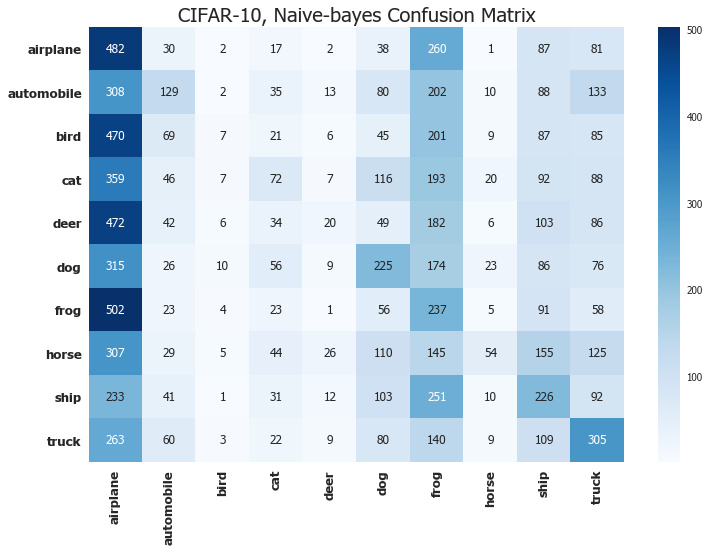

In [109]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(cifar_pred[:,0], cifar_pred[:,1])
df_cnf_matrix = pd.DataFrame(data=cnf_matrix)
plt.figure(figsize = (12,8))
plt.title('CIFAR-10, Naive-bayes Confusion Matrix',fontsize=20)
ax = sns.heatmap(df_cnf_matrix, annot=True, cmap='Blues',fmt='g')
ax.set_xticklabels(class_names,fontsize=13, weight='bold', rotation=90)
ax.set_yticklabels(class_names,fontsize=13, weight='bold',rotation=360)

### Comparison with a random classifier
<script type="text/javascript" src="http://latex.codecogs.com/latexit.js"></script>
Now, I want to compare accuracy and performance of the Naive-bayes classifier with the ones of a random classifier, i.e., a classifier that randomly generates labels.<br>
Since there are 10 classes in both datasets, I expect each class to have a probability of $\frac{1}{10}$, so a total accuracy of ~10%. 

In [110]:
start_time = time.time()
mnist_random_pred = np.array([(t_new, np.random.randint(0, N)) for t_new, x_new in mnist_test])
elapsed_time = time.time() - start_time
print('Fashion MNIST - Elapsed time: %.2f s' %elapsed_time)
print('Fashion MNIST - Accuracy Random Classifier: %.2f%%' % (accuracy(mnist_random_pred) * 100))

start_time = time.time()
cifar_random_pred = np.array([(t_new, np.random.randint(0, N)) for t_new, x_new in zip(cls_test, images_test)])
elapsed_time = time.time() - start_time
print('CIFAR-10 - Elapsed time: %.2f s' %elapsed_time)
print('CIFAR-10 - Accuracy Random Classifier: %.2f%%' % (accuracy(cifar_random_pred) * 100))

Fashion MNIST - Elapsed time: 0.10 s
Fashion MNIST - Accuracy Random Classifier: 9.48%
CIFAR-10 - Elapsed time: 0.09 s
CIFAR-10 - Accuracy Random Classifier: 10.01%


[Text(0,0.5,'airplane'),
 Text(0,1.5,'automobile'),
 Text(0,2.5,'bird'),
 Text(0,3.5,'cat'),
 Text(0,4.5,'deer'),
 Text(0,5.5,'dog'),
 Text(0,6.5,'frog'),
 Text(0,7.5,'horse'),
 Text(0,8.5,'ship'),
 Text(0,9.5,'truck')]

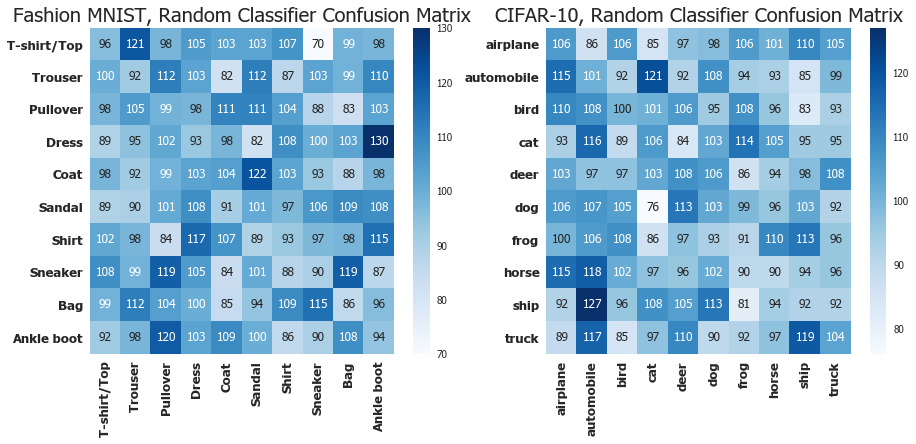

In [118]:
# Compute confusion matrix for Fashion MNIST random classifier
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,6)

cnf_matrix = confusion_matrix(mnist_random_pred[:,0], mnist_random_pred[:,1])
df_cnf_matrix = pd.DataFrame(data=cnf_matrix)
axes[0].set_title('Fashion MNIST, Random Classifier Confusion Matrix',fontsize=20)
ax = sns.heatmap(df_cnf_matrix, annot=True, cmap='Blues',fmt='g', ax=axes[0])
ax.set_xticklabels(mnist_labels,fontsize=13, weight='bold', rotation=90)
ax.set_yticklabels(mnist_labels,fontsize=13, weight='bold',rotation=360)

# Compute confusion matrix for CIFAR-10 random classifier
cnf_matrix = confusion_matrix(cifar_random_pred[:,0], cifar_random_pred[:,1])
df_cnf_matrix = pd.DataFrame(data=cnf_matrix)
axes[1].set_title('CIFAR-10, Random Classifier Confusion Matrix',fontsize=20)
ax = sns.heatmap(df_cnf_matrix, annot=True, cmap='Blues',fmt='g', ax = axes[1])
ax.set_xticklabels(class_names,fontsize=13, weight='bold', rotation=90)
ax.set_yticklabels(class_names,fontsize=13, weight='bold',rotation=360)

# Linear Regression